# Predicting Sale Price of Homes in Boston

I am using the famous Boston Housing Dataset from UCI

In this notebook, I upload the data, prepare it with some feature transforms, and then test the accuracy of 7 different regression algorithms, choosing the best one to tune for the final deployment

In [1]:
#Loading in all libraries
import numpy as np
from numpy import arange
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Load dataset
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv('housing.csv', delim_whitespace=True, names=colnames)

In [3]:
# Descriptive statistics
print(dataset.shape)
print(dataset.head(20))
print(dataset.dtypes)

(506, 14)
       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   
12  0.09378  12

In [4]:
# More Descriptive Statistics
set_option('precision', 1)
print(dataset.describe())

set_option('precision', 2)
print(dataset.corr(method='pearson'))

          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         TAX  PTRATIO      B  LSTAT   MEDV  
count  506.0    506.0  506.0  506.0  506.0  
mean   408.2     18.5  356.7   12.7   22.5  
std    168.5      2.2   91.3    7.1    9.2  
min    187.0     12.6    0.3    1.7    5.0  
25%    279.0     17.4  375.4    6.9   17.0  
50%    330.0     19.1  391.4   11.4   21.2  


# Data visualizations

In [74]:
#Matplotlib Settings
plt.rcParams['figure.figsize'] = [10, 10]

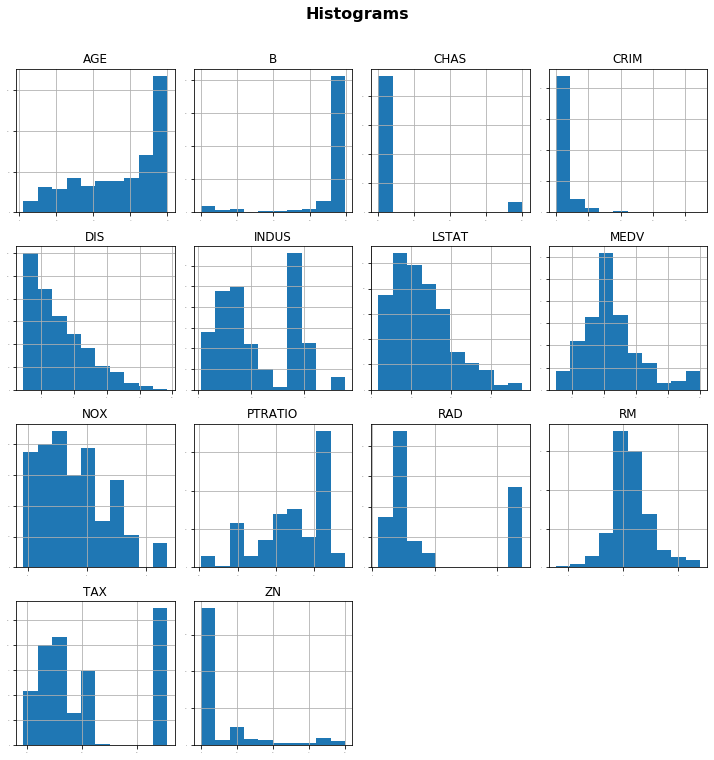

In [91]:
# histogram
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.suptitle("Histograms", y=1.05, size =16, fontname="Sans", weight='bold')
plt.tight_layout(pad=1)
plt.show()

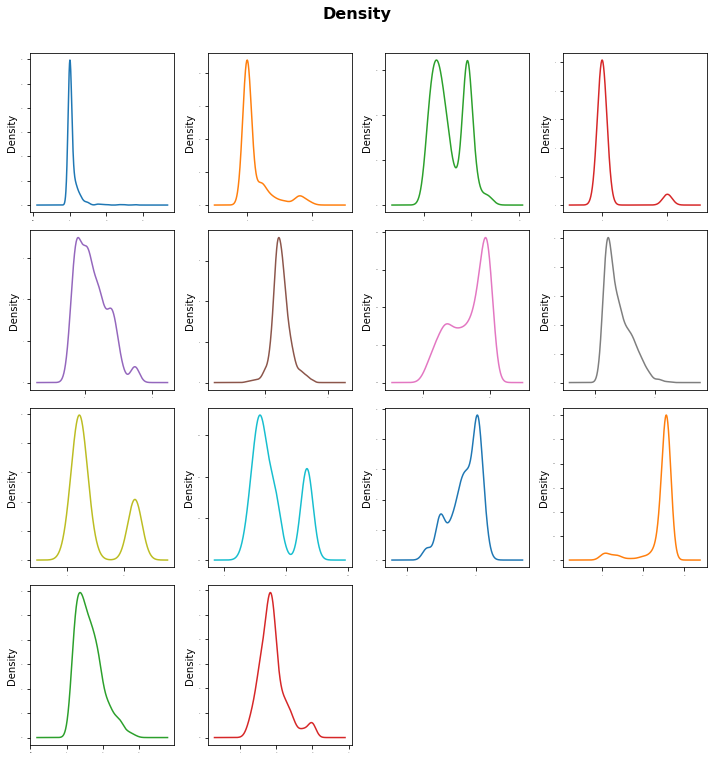

In [92]:
# density
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1)
plt.suptitle("Density", y=1.05, size =16, fontname="Sans", weight='bold')
plt.tight_layout(pad=1)
plt.show()

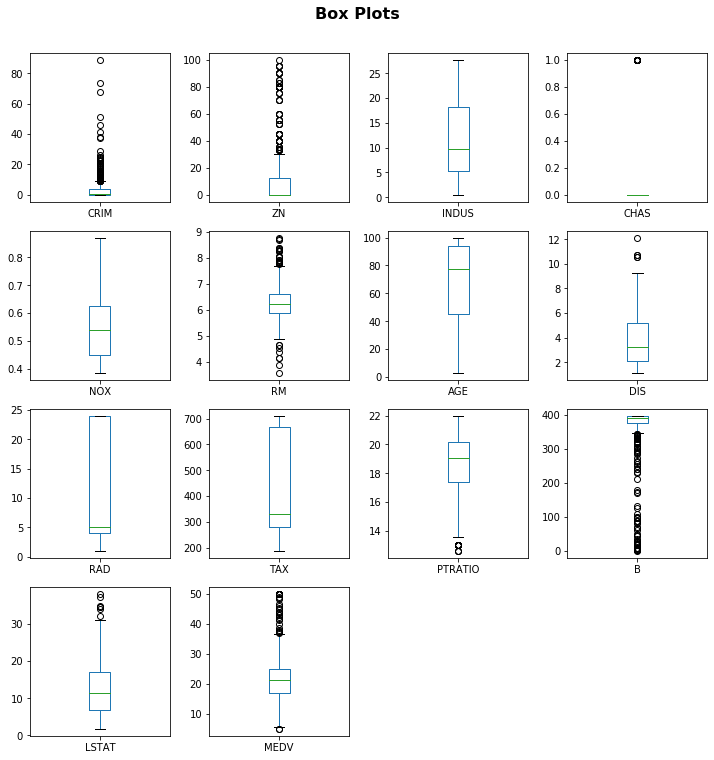

In [93]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.suptitle("Box Plots", y=1.05, size =16, fontname="Sans", weight='bold')
plt.tight_layout(pad=1)
plt.show()

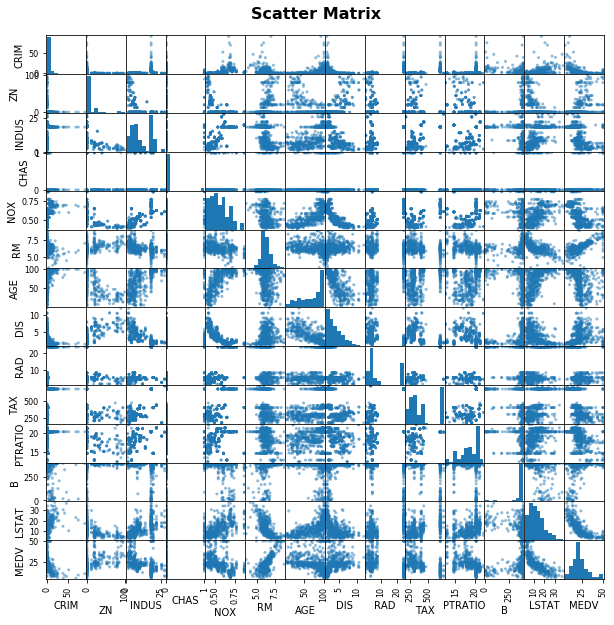

In [85]:
# scatter plot matrix
scatter_matrix(dataset)
plt.suptitle("Scatter Matrix", size =16, fontname="Sans", weight='bold', y=.92)
plt.show()

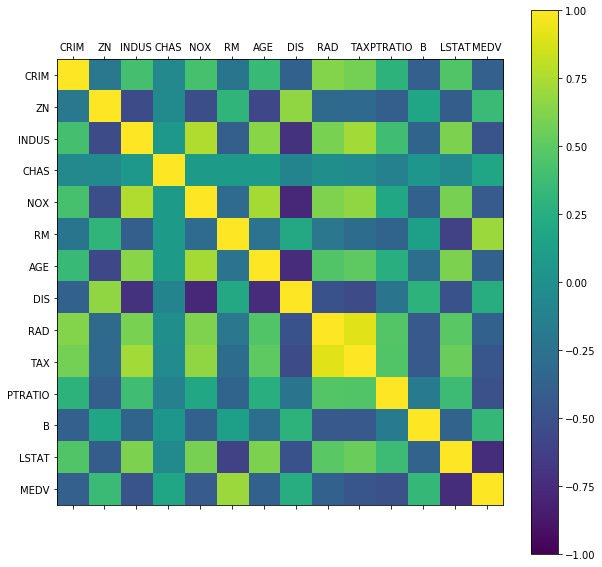

In [96]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colnames)
ax.set_yticklabels(colnames)
plt.show()


In [97]:
#Separating target variables and predictor variables
X = dataset.values[:,0:13]
Y = dataset.values[:,13]

In [99]:
#Creating Test Dataset
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=.2, random_state=7)

In [112]:
#List of Regression Algorithms for testing
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR(gamma='auto')))

In [113]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

In [114]:
#For Loop testing all models
results = []
names = []
for name, model in models:
	results.append(cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring))
	names.append(name)
	print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

LR: -85.676872 (34.383644)
LASSO: -85.676872 (34.383644)
EN: -85.676872 (34.383644)
KNN: -85.676872 (34.383644)
CART: -85.676872 (34.383644)
SVR: -85.676872 (34.383644)


In [ ]:
# Visual Comparison of Algorithm Performance
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [127]:
results = []
names = []
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
#kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)()))

SyntaxError: invalid syntax (<ipython-input-127-870e439de89b>, line 9)